### Day 02
1. Simple Moving Average
2. Cummulative Moving Average
3. Exponential Weight Moving Average
4. Moving Average Formula (ACF)
5. Autoregressive Model (PACF)

In [1]:
import pandas_datareader as pdr
import yfinance as yf
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_tesla = yf.download('TSLA')
print(df_tesla.head())

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [3]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-06-12,171.119995,180.550003,169.800003,177.289993,177.289993,90389400
2024-06-13,188.389999,191.080002,181.229996,182.470001,182.470001,118984100
2024-06-14,185.800003,186.000000,176.919998,178.009995,178.009995,82038200


## Simple Moving Average

<Axes: xlabel='Date'>

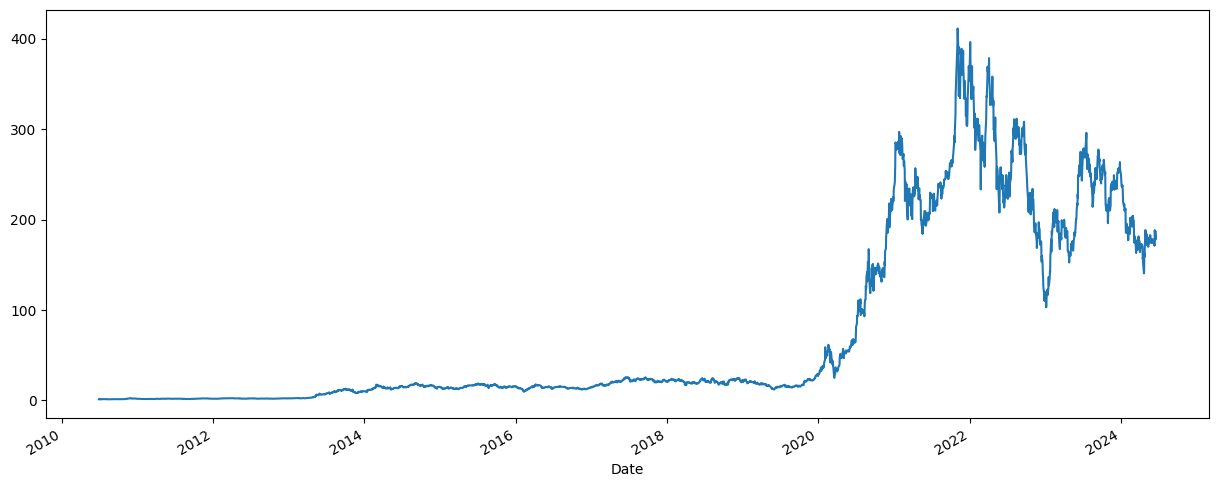

In [4]:
df_tesla['Open'].plot(figsize=(15,6))

In [5]:
df_tesla['Open:10 days rolling'] = df_tesla['Open'].rolling(window=10, min_periods=1).mean()

<Axes: xlabel='Date'>

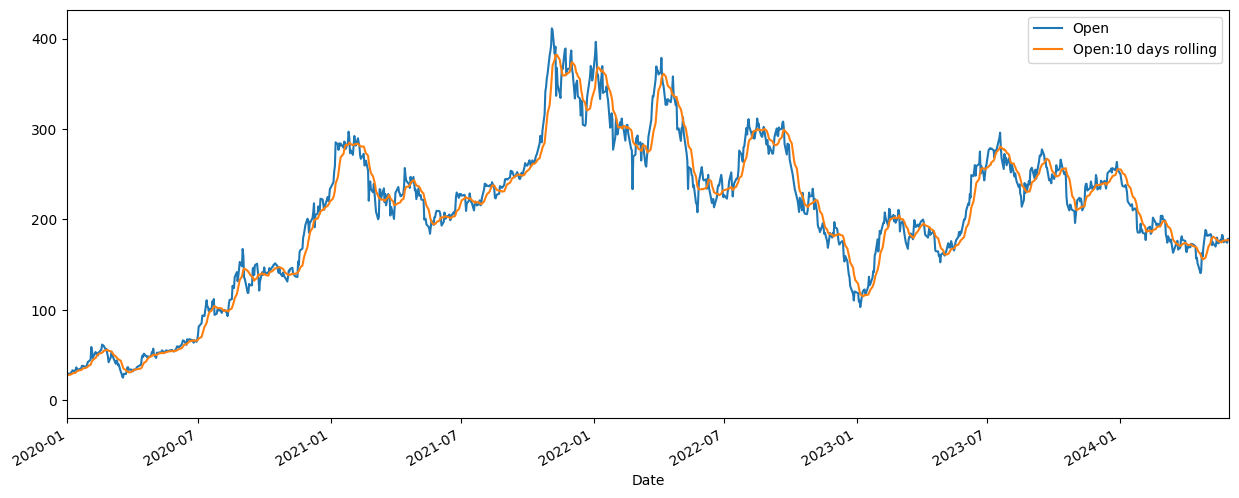

In [7]:
df_tesla[['Open','Open:10 days rolling']].plot(xlim=['2020-01-01','2024-06-01'], figsize=(15,6))

In [9]:
df_tesla['Open:30 days rolling'] = df_tesla['Open'].rolling(window=30, min_periods=1).mean()
df_tesla['Open:50 days rolling'] = df_tesla['Open'].rolling(window=50, min_periods=1).mean()

<Axes: xlabel='Date'>

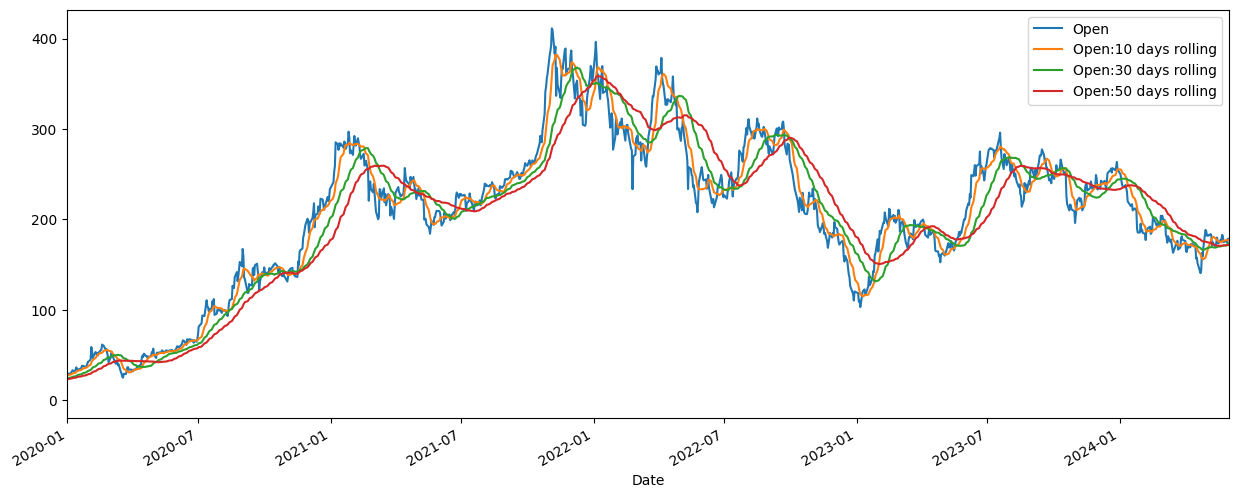

In [10]:
df_tesla[['Open','Open:10 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(xlim=['2020-01-01','2024-06-01'], figsize=(15,6))

In [11]:
# Cummulative Moving Average

<Axes: xlabel='Date'>

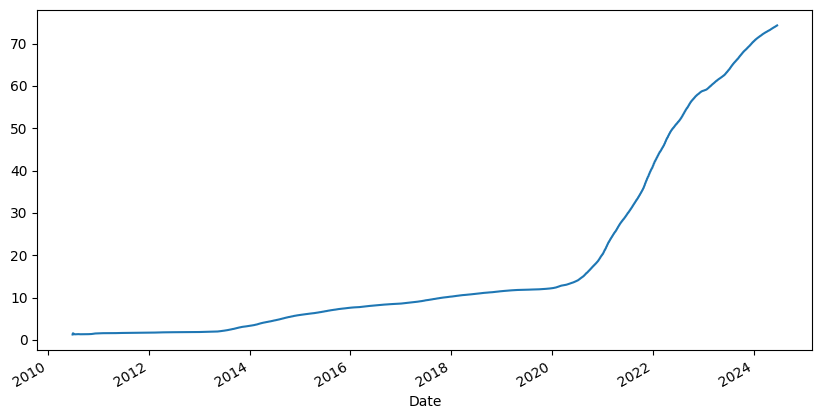

In [12]:
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

In [ ]:
# What is lag.? How to identify it.? how to prevent it.? advantages and disadvantages



### Exponential Moving Average

In [13]:
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()
# alpha is smoothening factor ranges from 0 to 1

In [16]:
df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha=0.3, adjust=False).mean()

<Axes: xlabel='Date'>

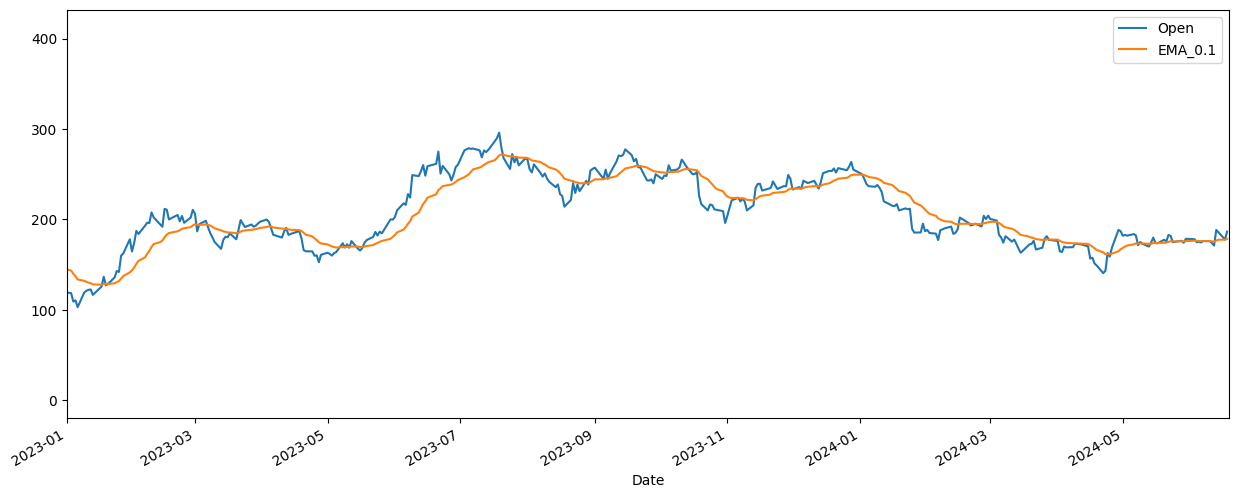

In [15]:
df_tesla[['Open','EMA_0.1']].plot(xlim = ['2023-01-01','2024-06-19'], figsize=(15,6))

<Axes: xlabel='Date'>

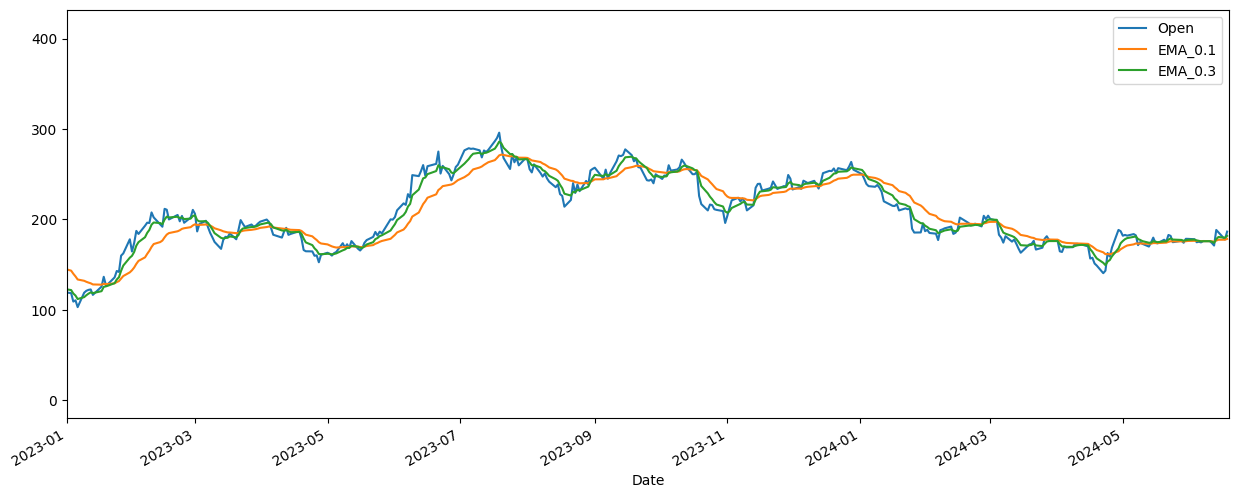

In [17]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim = ['2023-01-01','2024-06-19'], figsize=(15,6))

### Exponential Weighted Moving Average

In [18]:
df_tesla['EMA_5days'] = df_tesla['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

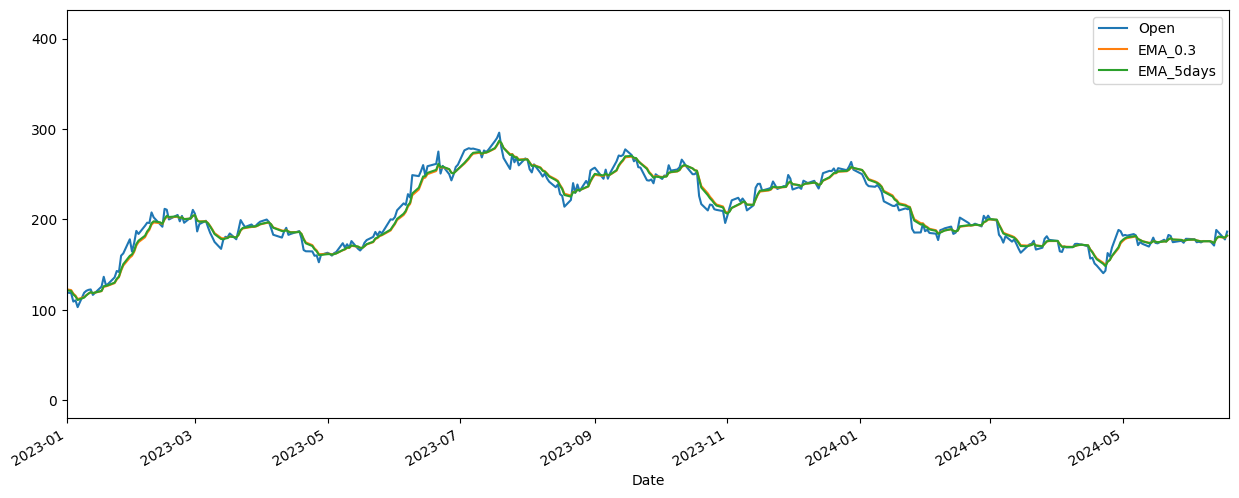

In [19]:
df_tesla[['Open','EMA_0.3','EMA_5days']].plot(xlim = ['2023-01-01','2024-06-19'], figsize=(15,6))

In [ ]:
# Which of these MA methods is good.?

# Which model is best for what applications.?
# For MA, which plot needs to be used, PACF, ACF